# Renewable Energy and Weather Conditions - Exploring the Impact of Weather on Renewable Energy Generation: A Hourly Analysis
## from https://www.kaggle.com/datasets/samanemami/renewable-energy-and-weather-conditions
## I will perform some exploratory data analysis and then some forecasting techniques.

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import pandas_profiling
import seaborn as sns
import datetime as dt

import xgboost as xgb# for XGBoost algorithm
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


# Set the default plot size
plt.rcParams['figure.figsize'] = [15, 8]
# set a grid for each plot too
sns.set_style("whitegrid")

## Import the dataset - convert the Time column to datetime datatype and convert the dates upon import

In [2]:
#df = pd.read_csv("../input/solar-power/solar_weather.csv", index_col='Time', parse_dates=True)
df =  pd.read_csv("/home/chris/kaggle/renewable_energy_and weather_conditions/solar_weather.csv", index_col='Time', parse_dates=True)

In [3]:
df.head()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
Time,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 196776 entries, 2017-01-01 00:00:00 to 2022-08-31 17:45:00
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Energy delta[Wh]        196776 non-null  int64  
 1   GHI                     196776 non-null  float64
 2   temp                    196776 non-null  float64
 3   pressure                196776 non-null  int64  
 4   humidity                196776 non-null  int64  
 5   wind_speed              196776 non-null  float64
 6   rain_1h                 196776 non-null  float64
 7   snow_1h                 196776 non-null  float64
 8   clouds_all              196776 non-null  int64  
 9   isSun                   196776 non-null  int64  
 10  sunlightTime            196776 non-null  int64  
 11  dayLength               196776 non-null  int64  
 12  SunlightTime/daylength  196776 non-null  float64
 13  weather_type            196776 non-null 

## check the index name (just to be sure it is Time - it is)

In [5]:
df.index.name

'Time'

## also make sure it is of type datetime - it is !

In [6]:
df.index.dtype

dtype('<M8[ns]')

In [7]:
# desciption of the data
df.describe()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
count,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000
mean,573.008228,32.596538,9.790521,1015.292780,79.810566,3.937746,0.066035,0.007148,65.974387,0.519962,211.721094,748.644347,0.265187,3.198398,11.498902,6.298329
std,1044.824047,52.172018,7.995428,9.585773,15.604459,1.821694,0.278913,0.069710,36.628593,0.499603,273.902186,194.870208,0.329023,1.289939,6.921887,3.376066
min,0.000000,0.000000,-16.600000,977.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000,1.000000,0.000000,1.000000
25%,0.000000,0.000000,3.600000,1010.000000,70.000000,2.600000,0.000000,0.000000,34.000000,0.000000,0.000000,570.000000,0.000000,2.000000,5.000000,3.000000
50%,0.000000,1.600000,9.300000,1016.000000,84.000000,3.700000,0.000000,0.000000,82.000000,1.000000,30.000000,765.000000,0.050000,4.000000,11.000000,6.000000
75%,577.000000,46.800000,15.700000,1021.000000,92.000000,5.000000,0.000000,0.000000,100.000000,1.000000,390.000000,930.000000,0.530000,4.000000,17.000000,9.000000
max,5020.000000,229.200000,35.800000,1047.000000,100.000000,14.300000,8.090000,2.820000,100.000000,1.000000,1020.000000,1020.000000,1.000000,5.000000,23.000000,12.000000


In [8]:
# Any nulls - no
df.isna().sum()

Energy delta[Wh]          0
GHI                       0
temp                      0
pressure                  0
humidity                  0
wind_speed                0
rain_1h                   0
snow_1h                   0
clouds_all                0
isSun                     0
sunlightTime              0
dayLength                 0
SunlightTime/daylength    0
weather_type              0
hour                      0
month                     0
dtype: int64

# Next step is to do some basic graphs 
## Histograms to show the distributions and box plots to show potential for outliers

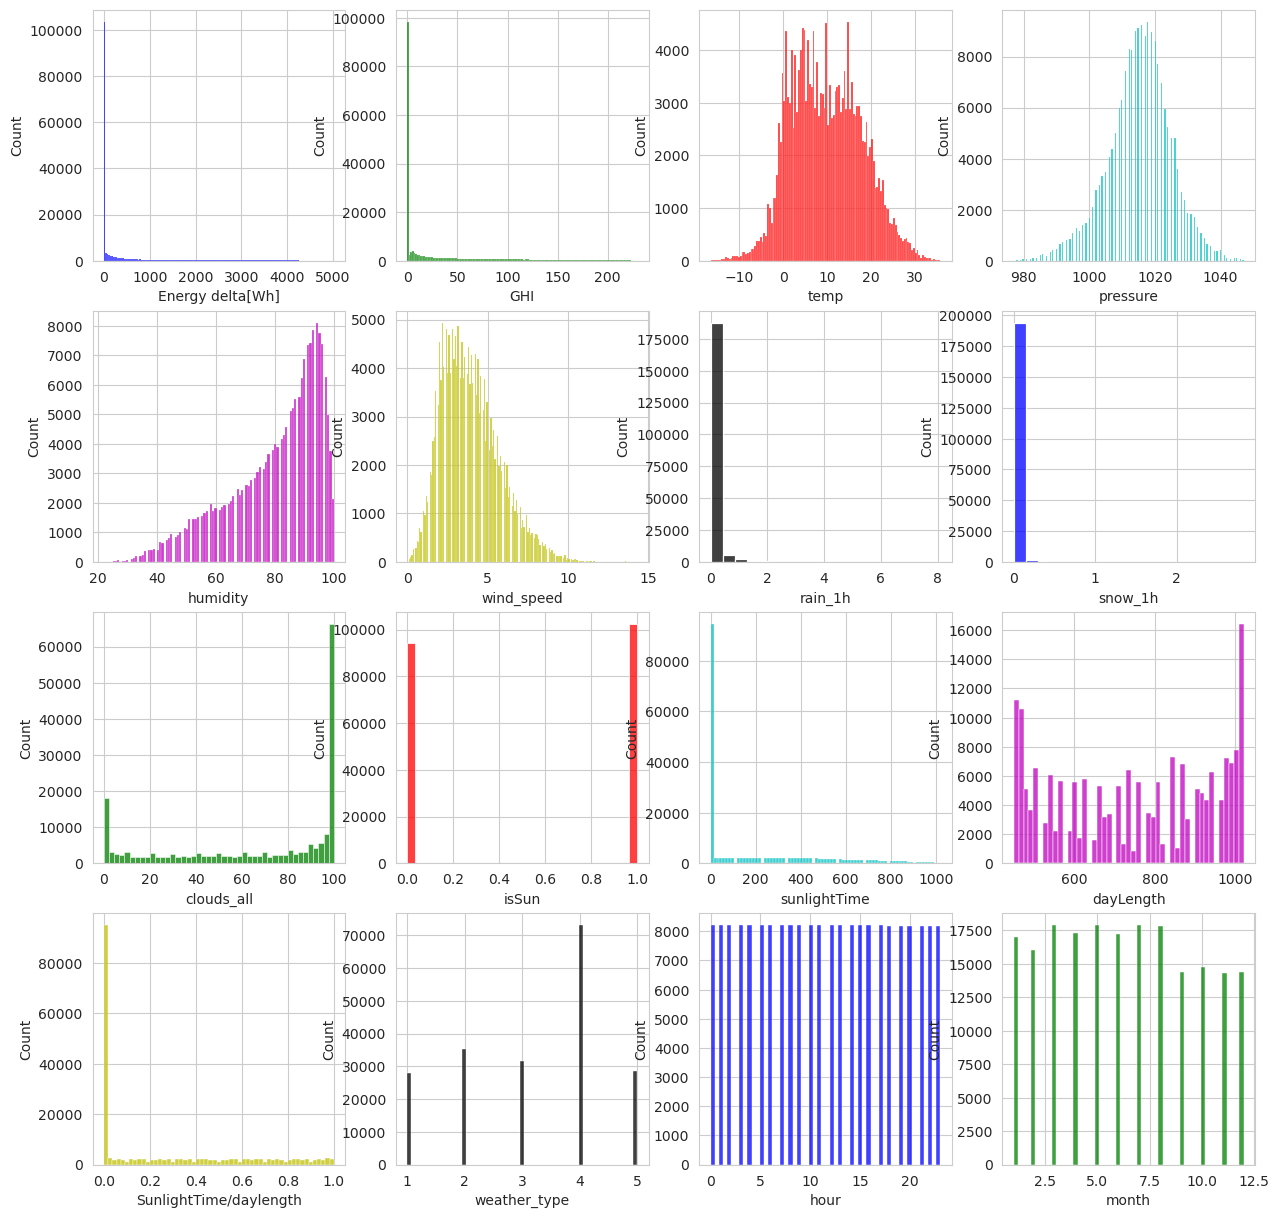

In [9]:
# Create a 4x4 grid of subplots
fig, axes = plt.subplots(4, 4, figsize=(15, 15))
colours = "bgrcmykbgrcmykbg"

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate through the columns and create separate plots
for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=axes[i], color=colours[i])  


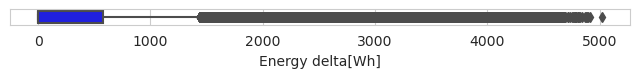

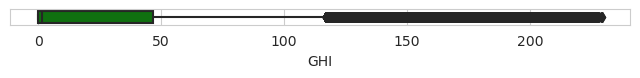

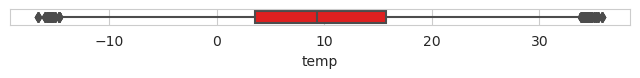

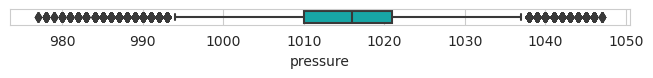

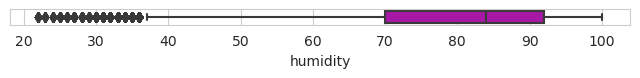

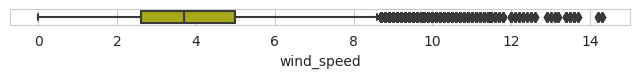

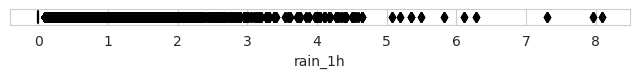

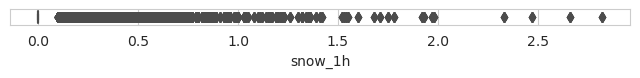

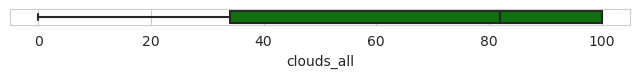

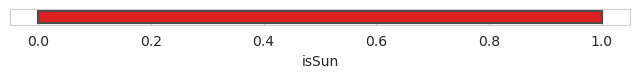

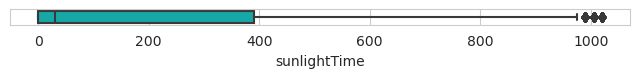

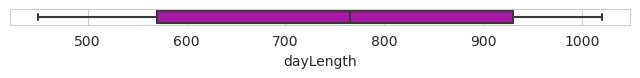

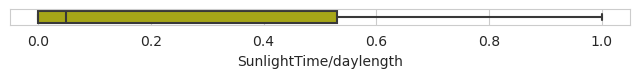

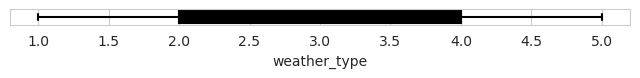

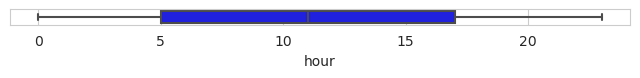

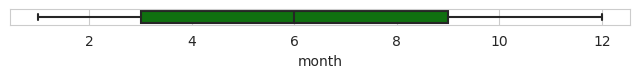

In [10]:
# Boxplots of all the data
colours = "bgrcmykbgrcmykbg"
i=0
for column in df:    
    fig,ax = plt.subplots(figsize=(8,0.2))
    sns.boxplot(data=df, x=column, color= colours[i]) 
    i+=1

# Now graph energy consumption (mean for each weather type) versus weather type to look for patterns - type 1 is the highest and type 5 is the lowest
## Below that is graph of Energy delta by month of year and by hour of day
## Then energy delta versus temperature - note more energy is used in the hotter temperatures than in the colder temperatures and more energy is used in the middle of the day compared to the evening, since the mean is taken to get the values a boxplot of the range of hourly values is also shown.

Text(0.5, 1.0, 'Energy Delta by Weather Type')

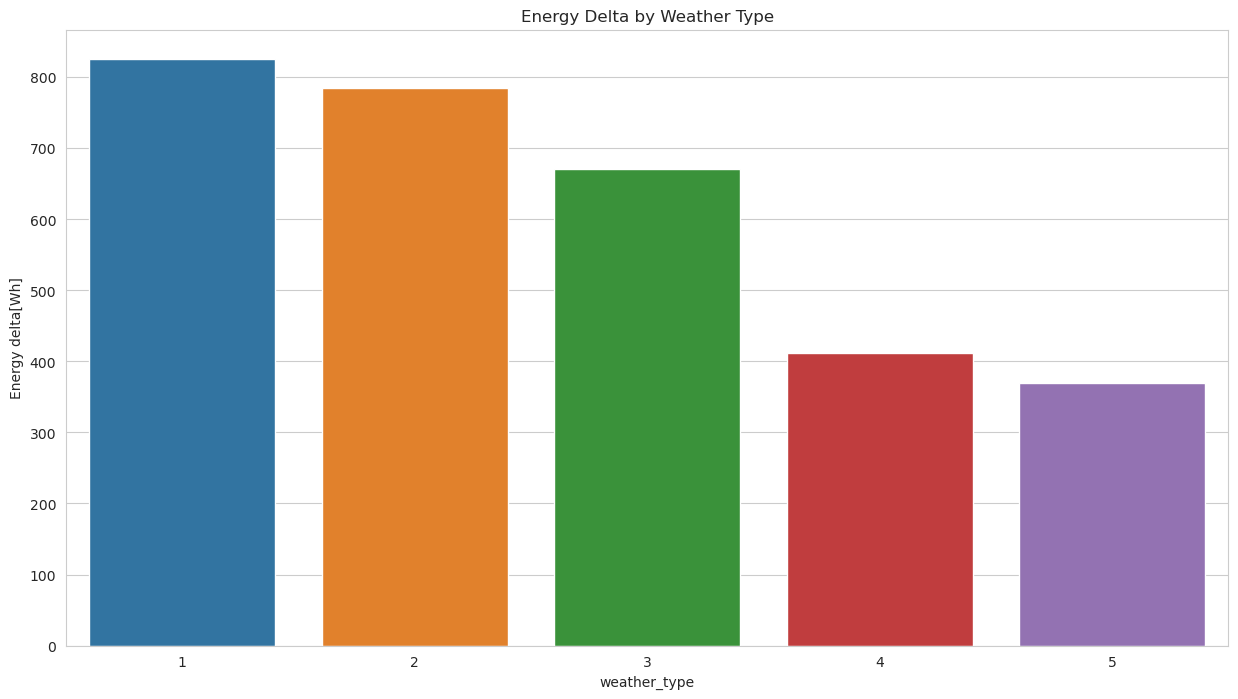

In [11]:
df_wx_type = df.groupby('weather_type').mean() 
sns.barplot(data=df_wx_type, x=df_wx_type.index, y= 'Energy delta[Wh]')
plt.title('Energy Delta by Weather Type')

Text(0.5, 1.0, 'Energy Delta by Month')

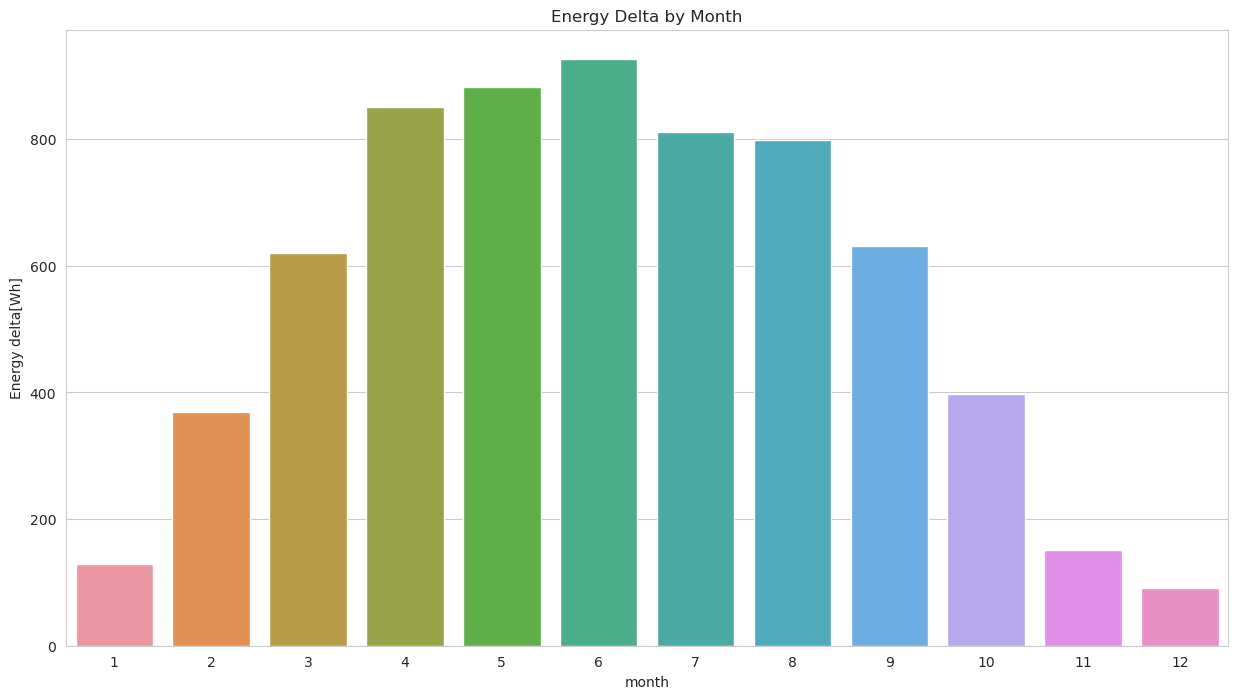

In [12]:
df_month = df.groupby('month').mean() 
sns.barplot(data=df_month, x=df_month.index, y= 'Energy delta[Wh]')
plt.title('Energy Delta by Month')

Text(0.5, 1.0, 'Energy Delta by Hour')

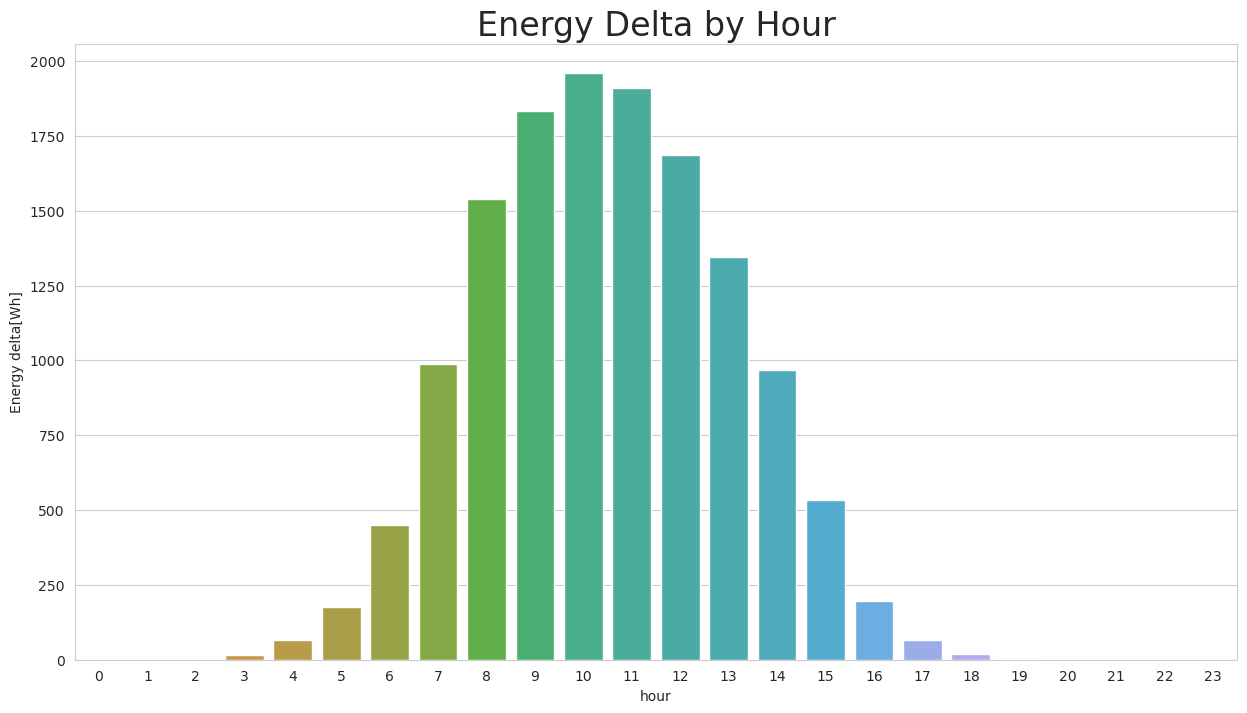

In [13]:
df_hour = df.groupby('hour').mean() 
sns.barplot(data=df_hour, x=df_hour.index, y='Energy delta[Wh]')
plt.title('Energy Delta by Hour', fontsize=24)

Text(0.5, 1.0, 'Range of Energy Delta values per hour')

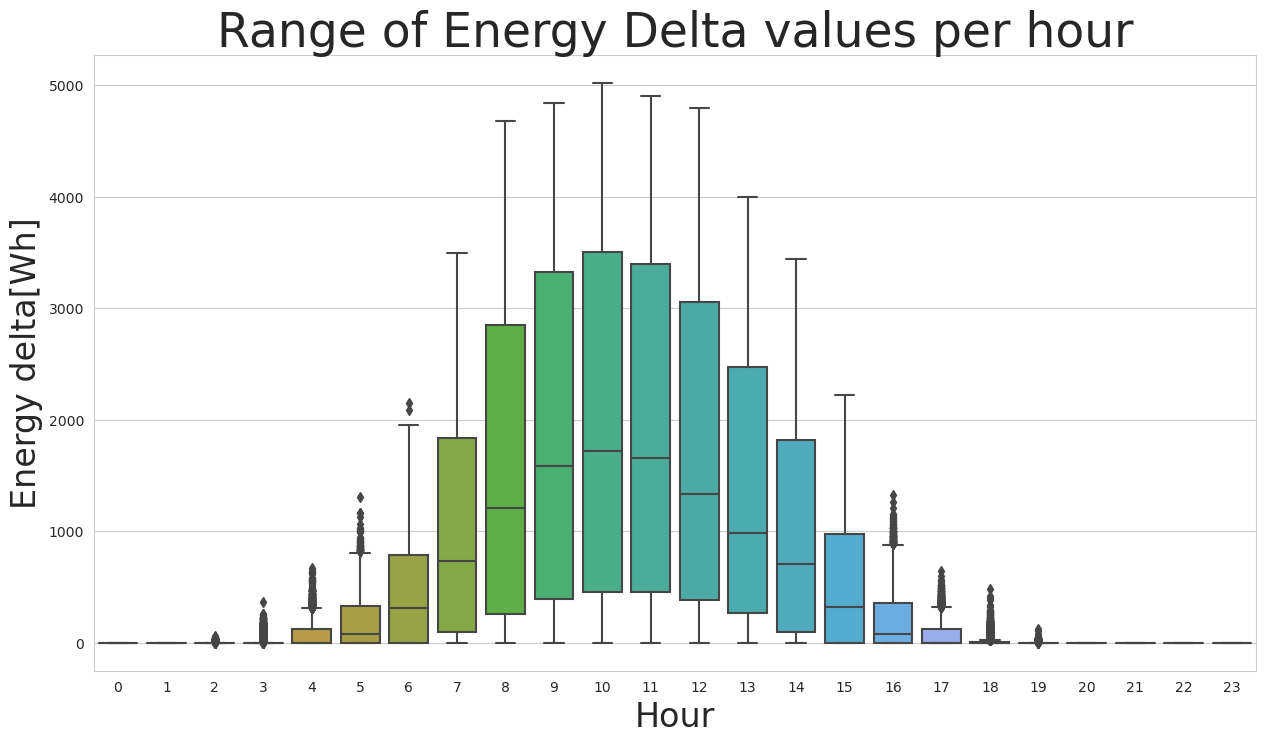

In [14]:
# Now to visualise amount of EDnergy Delta by hour
sns.boxplot(x=df.index.hour, y='Energy delta[Wh]', data=df) 
plt.ylabel('Energy delta[Wh]', fontsize=24)
plt.xlabel('Hour', fontsize=24)
plt.title("Range of Energy Delta values per hour", fontsize=34)

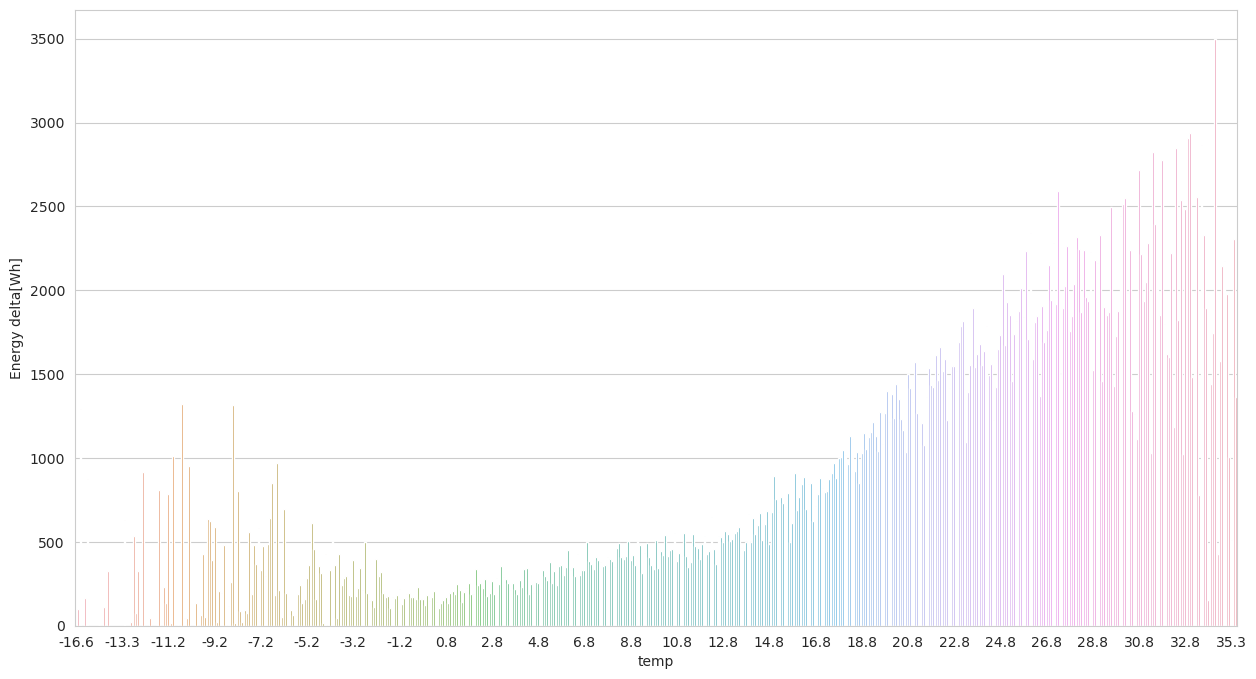

In [15]:
# More energy is used in warmer temperatures indicating greater use of air conditioners to cool rather than heaters to warm.
fig, ax = plt.subplots(1, 1, figsize=(15,8))

df_temp = df.groupby('temp').mean() 
sns.barplot(data=df_temp, x=df_temp.index, y='Energy delta[Wh]')

# only put labels every 20th label - roughly every 2 degrees - saves x axis being so cluttered
for i, label in enumerate(ax.get_xticklabels()):
    if i % 20 != 0:  # Display every twentieth label
        label.set_visible(False)

# Next to get the correlations between the features - things to note (only comparing Energy Delta - ED) :
## ED is strongly correlated to the amount ot available irradiance - suggesting the more sun there is the more likely energy will be used ?
## ED negatively correlated to the humidity - suggesting when it is humid it isn't hot - so it is a dry heat at this location - and energy not needed in the rain/cool as much
## ED positively correlated to the temperature (but not as strongly as the humidity)
## In fact highest ED positive correlation is with isSun - so if it is sunny there is more energy likely to be used. 

<AxesSubplot: >

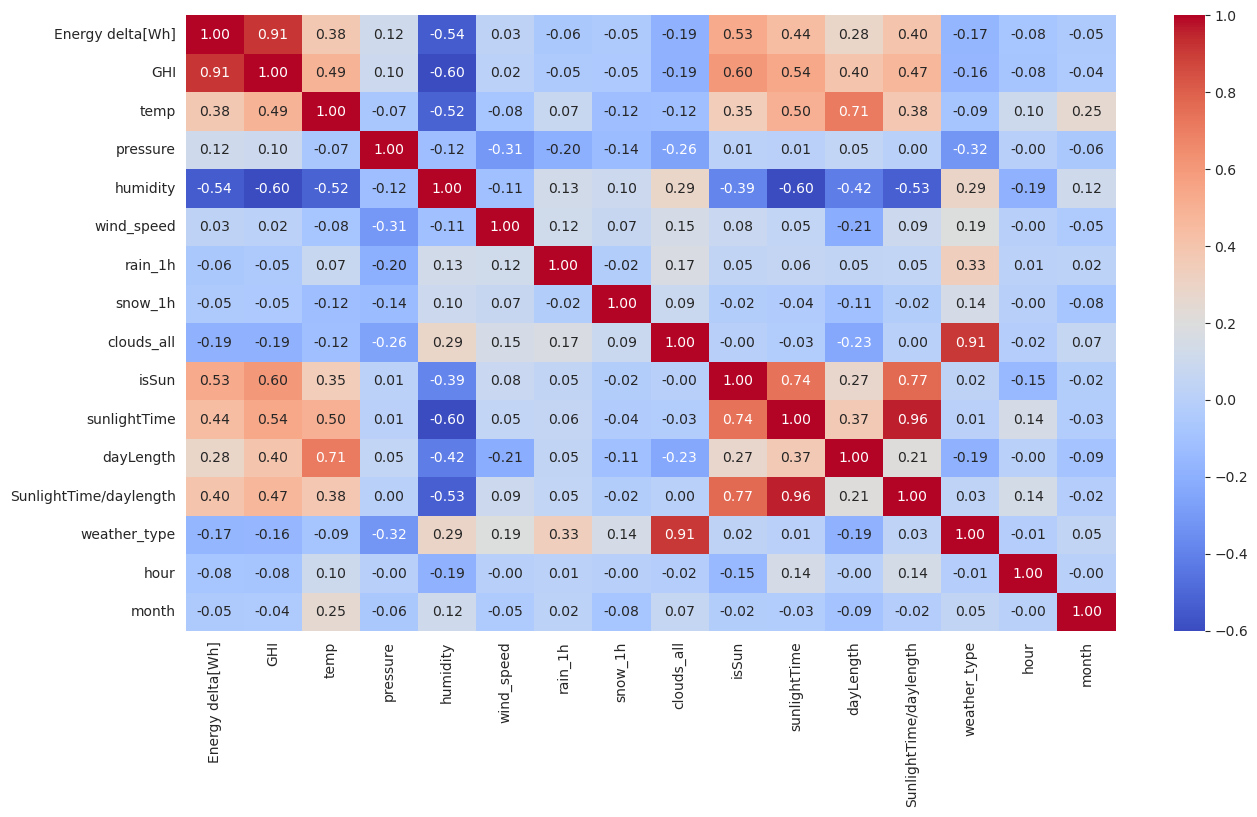

In [16]:
# get correlations for all columns 
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

# Based on the correlations above a model will be developed to see if we can forecast energy usage based on all the features (predictors)
## Here is another way (list) of looking at the correlations as  - see below

In [17]:
# form the correlation variable created above let's get the top 3 (using absolute value to get either positive or negative) correlations with Energy delta
corr[['Energy delta[Wh]']].abs().sort_values(by='Energy delta[Wh]', axis=0, ascending=False)

,Energy delta[Wh]
Energy delta[Wh],1.000000
GHI,0.914619
humidity,0.544407
isSun,0.526952
sunlightTime,0.437296
SunlightTime/daylength,0.402523
temp,0.378554
dayLength,0.280695
clouds_all,0.190241
weather_type,0.170046


# Predictions of Energy delta based using XGBoost
## Time of the dataset ranges hourly from '2017-01-01 00:00:00' to '2022-08-31 17:45:00'


In [18]:
df.index.min(),df.index.max()

(Timestamp('2017-01-01 00:00:00'), Timestamp('2022-08-31 17:45:00'))

# Next step is to break up the data into training/testing dataset to analyse algorithm performance - using the whole dataset - strify based on month so that the same number of train samples come from each month.

In [19]:
# all columns except Energy Delta - the predictors
X = df.drop('Energy delta[Wh]', axis=1)
# Energy Delta - the target variable
y = df['Energy delta[Wh]']

# use stratify by montth to make sure we get the same number of days for each month - so the data doesn't get skewed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=X.index.month)
print('# train X:',len(X_train),'# test X:',len(X_test),'# train y:',len(y_train),'# test y:',len(y_test))

# train X: 137743 # test X: 59033 # train y: 137743 # test y: 59033


# Since the target variable is continuous we need to use a regression style of model - and XGBoosts version is XGBRegressor 
## Note the model makes some negative predictions for Energy Delta, which obviously doesn't make sense, so set them to 0

                     Predictions  Actuals
Time                                     
2017-09-09 19:00:00    -1.195226        0
2019-03-02 03:00:00    -1.180550        0
2019-02-21 18:45:00    -8.689149        0
2019-10-27 19:15:00    -2.220597        0
2020-05-03 02:15:00    -0.156474        0
                     Predictions  Actuals
Time                                     
2017-09-09 19:00:00          0.0        0
2019-03-02 03:00:00          0.0        0
2019-02-21 18:45:00          0.0        0
2019-10-27 19:15:00          0.0        0
2020-05-03 02:15:00          0.0        0

Accuragy for XGBRegressor                                     = 0.94
The Coefficient of determination (R-squared) for XGBRegressor = 0.94
The mean absolute error (MAE) for XGBRegressor                = 111.87
The RMSE error (RMSE) for XGBRegressor                        = 70673.05


/tmp/ipykernel_393161/2526800900.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Predictions'][df_final['Predictions']<0] = 0


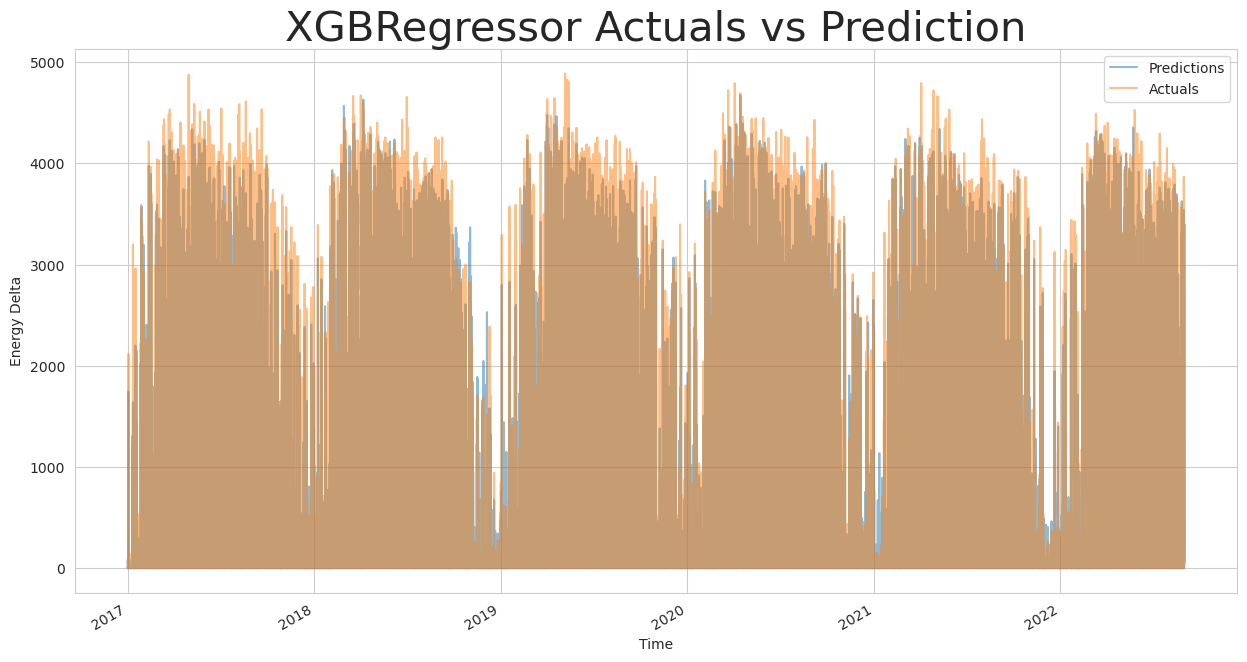

In [20]:
regr = XGBRegressor(objective ='reg:squarederror') # this is the defualt objective but i played with other - this gave the best result
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)
# store the original and predicted value in a dataframe
df_final = pd.DataFrame(data={'Predictions':y_pred, 'Actuals':y_test }) 

# the model gives some negative predictions which doesn't make sense so set them to 0
print(df_final[df_final['Predictions']<0].head())
# set these negative values to 0
df_final['Predictions'][df_final['Predictions']<0] = 0
# print them again just to confirm
print(df_final[df_final['Predictions']==0].head())
# zoom in to 300 values - note due to stratification the samples are random and the whole timeseries appears
df_final.plot(alpha=0.5) # reduce opacity to see both lines
plt.title('XGBRegressor Actuals vs Prediction', fontsize=30)
plt.ylabel('Energy Delta')
print('\nAccuragy for XGBRegressor                                     = {:.2f}'.format(regr.score(X_test, y_test)))    
print('The Coefficient of determination (R-squared) for XGBRegressor = {:.2f}'.format(r2_score(df_final['Actuals'],df_final['Predictions'])))
print('The mean absolute error (MAE) for XGBRegressor                = {:.2f}'.format(mean_absolute_error( df_final['Actuals'],df_final['Predictions'])))
print('The RMSE error (RMSE) for XGBRegressor                        = {:.2f}'.format(mean_squared_error( df_final['Actuals'],df_final['Predictions']), squared=True))

# From the graph above and the R squared value there is generally good agreement between the predicted value in Blue versus the actual values in orange - with some obvious exceptions
## The R quesred value of 0.94 means 94% of the variation in Energy delta is explained by the other parameters used as predictors
## Let's look at some more algorithms to see if XGBoost is the best or can be improved upon

In [21]:
'''
Function to perform regressions, accuracy calculations and plots
'''    
from sklearn import linear_model 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

def regression_calculations(X_train, y_train, X_test, y_test, regressor):
    
    regr = regressor.fit(X_train,y_train)
    y_pred = regr.predict(X_test)
    # store the orignial and predicted value in a dataframe
    df_final = pd.DataFrame(data={'Predictions':y_pred, 'Actuals':y_test })      
    df_final.plot(alpha=0.5) # reduce opacity to see both lines
    plt.title(regressor, fontsize=30)
    plt.ylabel('Energy Delta')
    print('Accuragy for                                     ',regressor, ' = {:.4f}'.format(regr.score(X_test, y_test)))    
    print('The Coefficient of determination (R-squared) for ',regressor, ' = {:.2f}'.format(r2_score(df_final['Actuals'],df_final['Predictions'])))
    print('The mean absolute error (MAE) for                ',regressor, ' = {:.2f}'.format(mean_absolute_error( df_final['Actuals'],df_final['Predictions'])))
    print('The RMSE error (RMSE) for                        ',regressor, ' = {:.2f}'.format(mean_squared_error( df_final['Actuals'],df_final['Predictions']), squared=False))
   
    
    print('\n\n')
  

In [22]:
# define the different regressors
regressors = [LinearRegression(), DecisionTreeRegressor(), SVR(), linear_model.Lasso(), RandomForestRegressor(), GradientBoostingRegressor()] 

Accuragy for                                      LinearRegression()  = 0.8560
The Coefficient of determination (R-squared) for  LinearRegression()  = 0.86
The mean absolute error (MAE) for                 LinearRegression()  = 222.89
The RMSE error (RMSE) for                         LinearRegression()  = 157128.26



Accuragy for                                      DecisionTreeRegressor()  = 0.8704
The Coefficient of determination (R-squared) for  DecisionTreeRegressor()  = 0.87
The mean absolute error (MAE) for                 DecisionTreeRegressor()  = 147.83
The RMSE error (RMSE) for                         DecisionTreeRegressor()  = 141386.83



Accuragy for                                      SVR()  = 0.4314
The Coefficient of determination (R-squared) for  SVR()  = 0.43
The mean absolute error (MAE) for                 SVR()  = 361.93
The RMSE error (RMSE) for                         SVR()  = 620391.05



Accuragy for                                      Lasso()  = 0.8557
The 

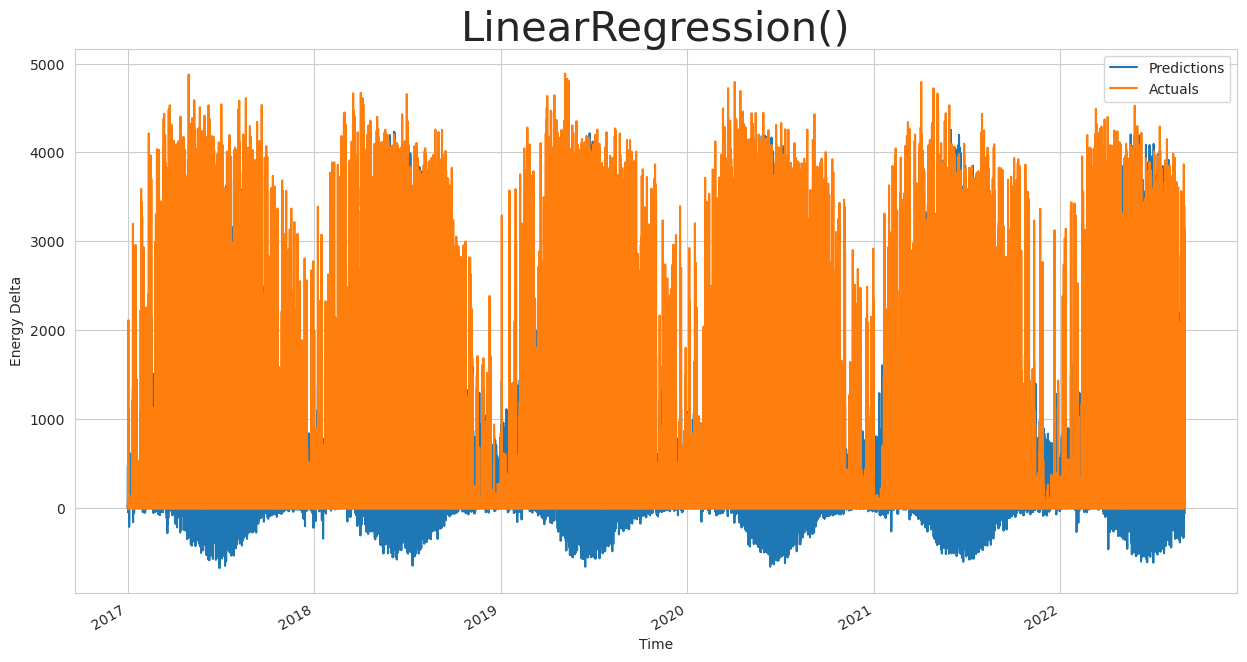

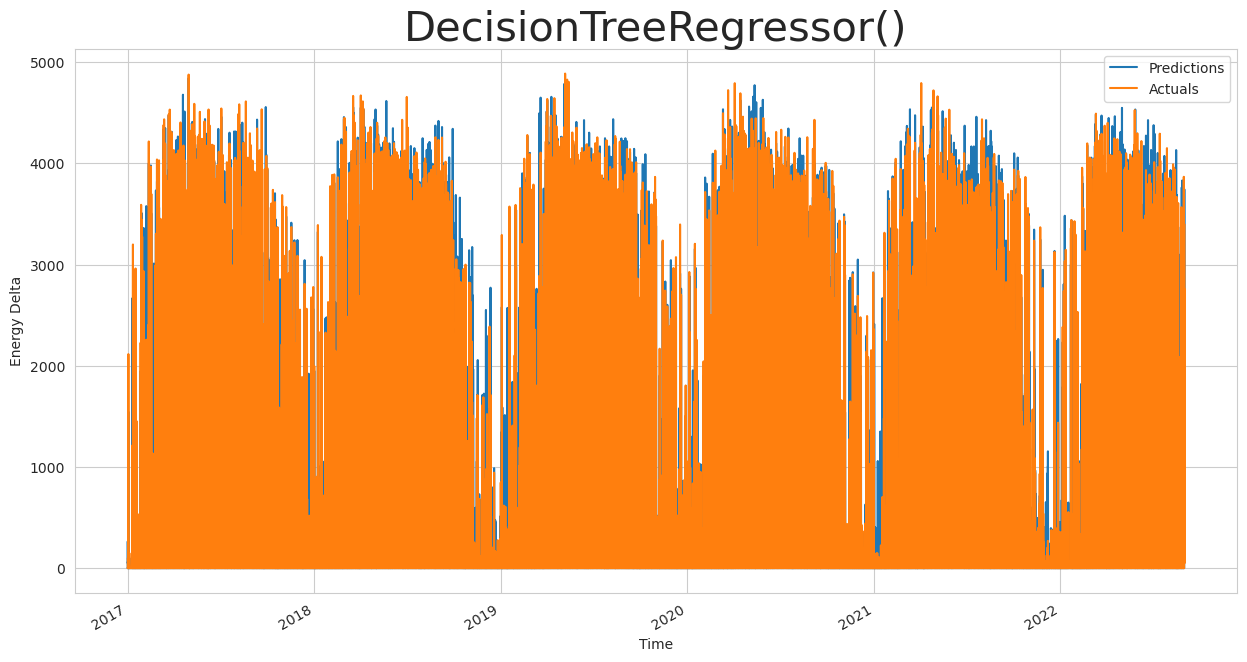

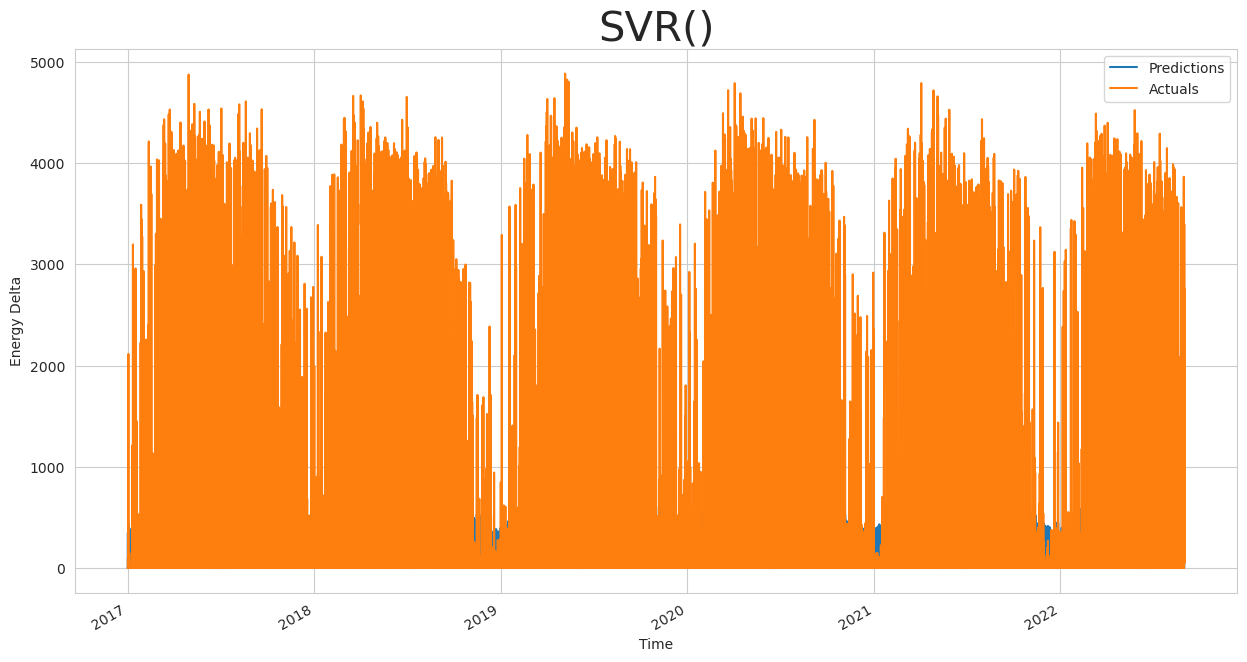

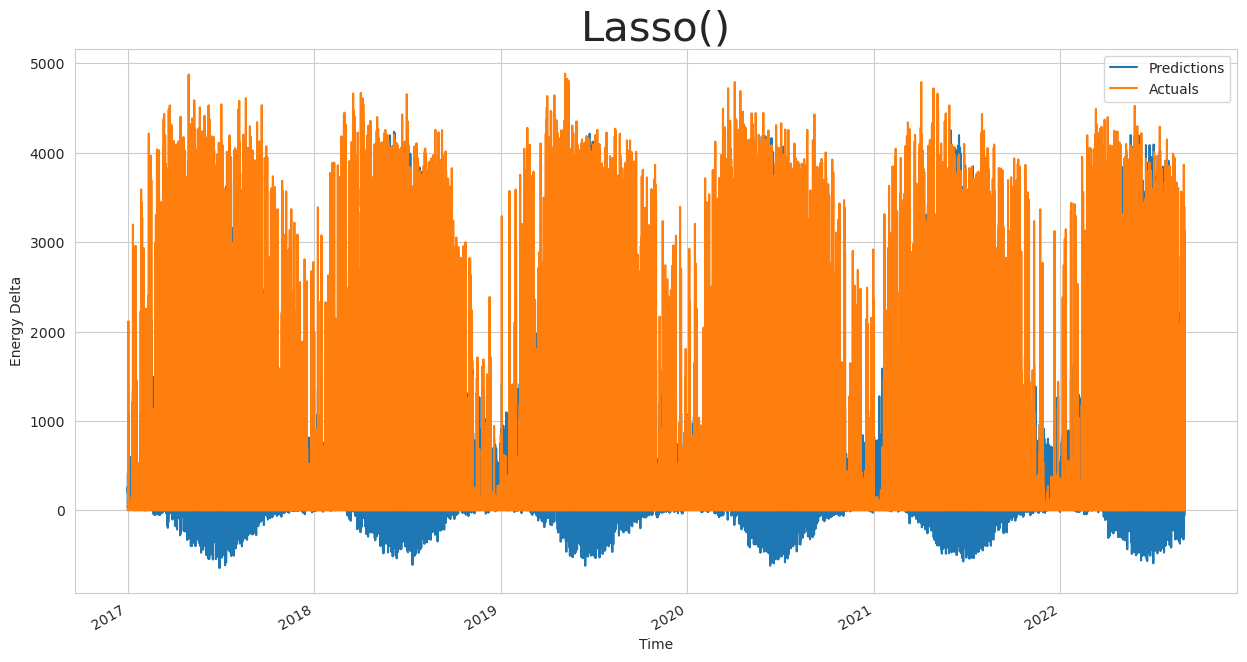

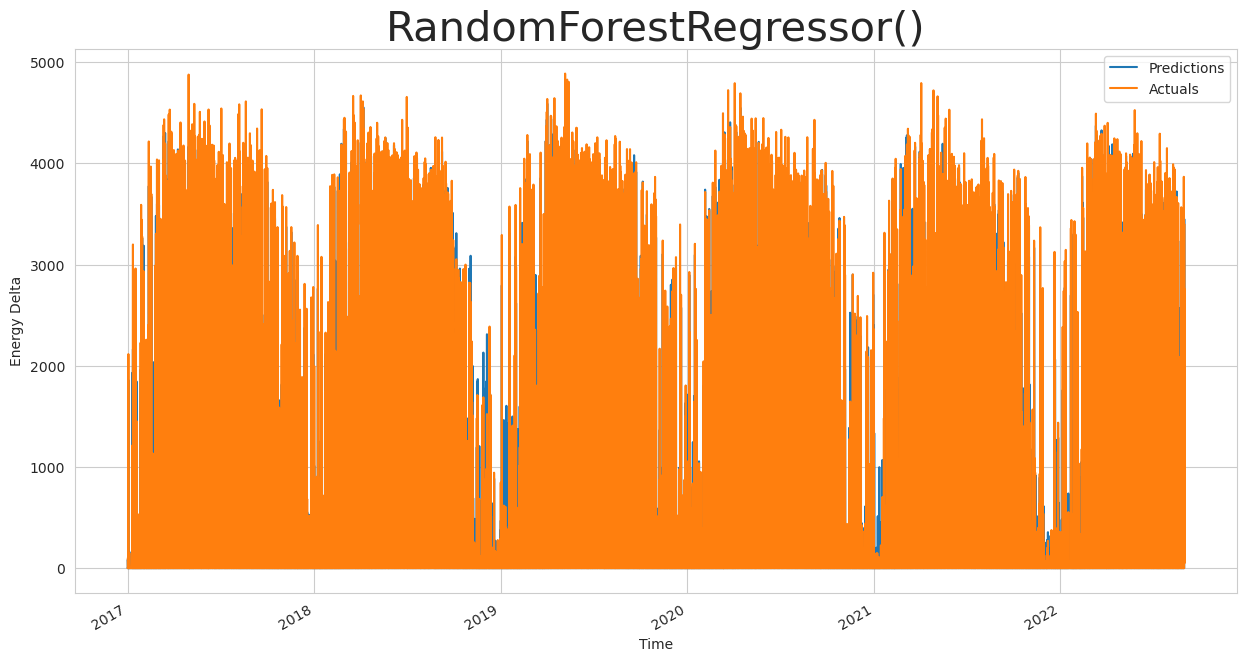

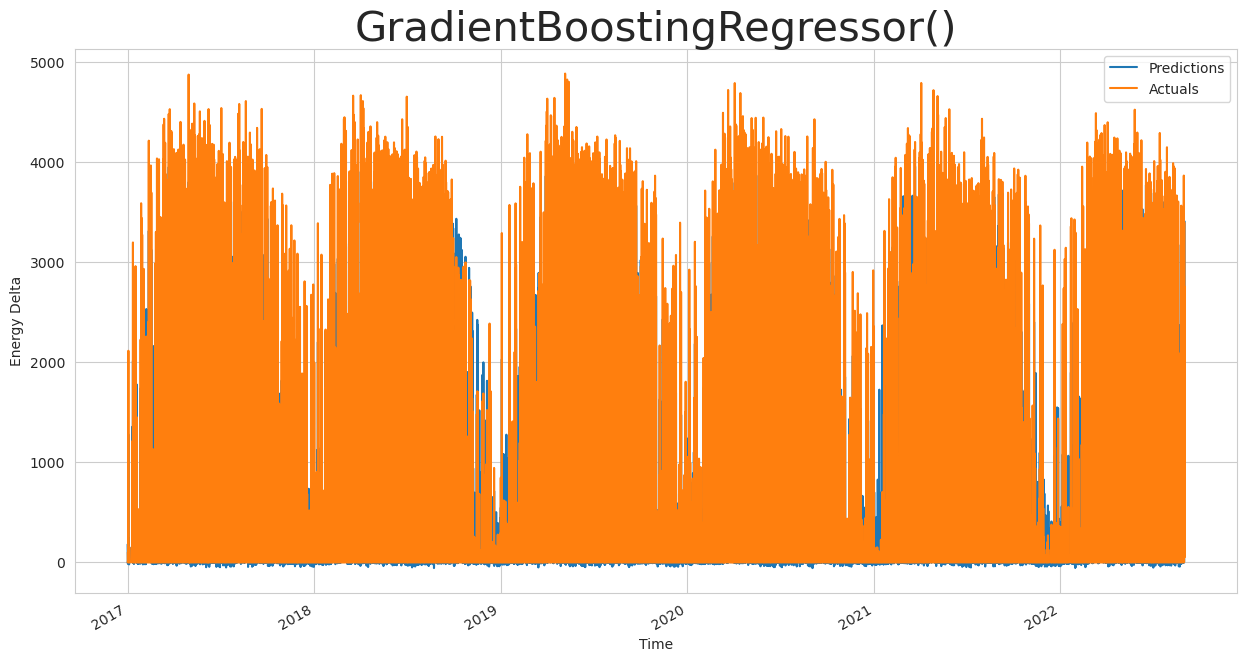

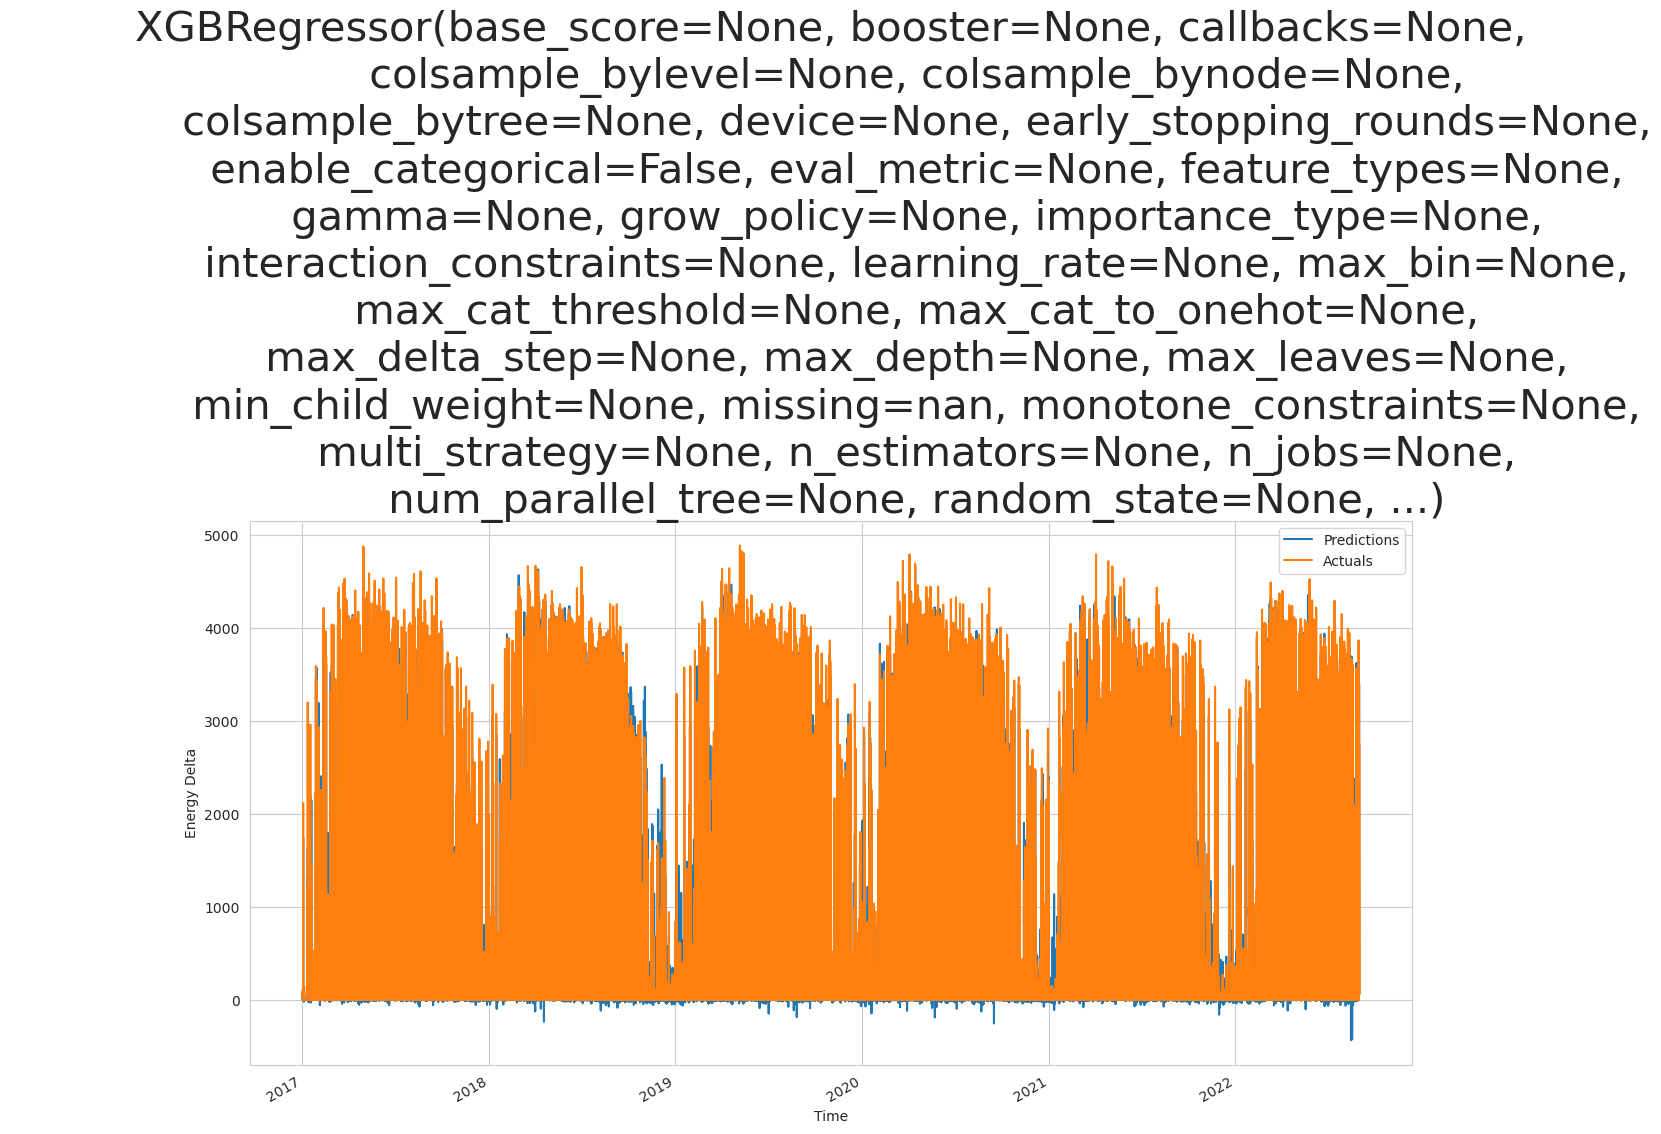

In [23]:
#loop through the different regressors
for regressor in regressors:
    pred = regression_calculations(X_train, y_train, X_test, y_test, regressor)
    

# Conclusion
## Using the paramaters given in this dataset the Energy Delta values can be predicted to around 93-94% accuracy. It would seem that XGRegressor is the most accurate but only just with RandomForeest regressor also a fairly similar value.